#Análisis de datos

El análisis de datos es cada vez más empleado en las empresas. En esta guía abordaremos las siguientes acciones dentro del análisis de datos:
- Cargar los datos
- Preparar los datos
- Análisis descriptivo
- Análisis predictivo

Por:

Ferney Orlando Amaya Fernández


Inicialmente se cargan las librerías a emplear:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

#1.Carga de los datos

Se cargará un archivo en formato Excel desde un repositorio en Github:

In [ ]:
# Ruta del archivo en la Google Drive
ruta_archivo = 'https://github.com/FerneyOAmaya/Competencias-Digitales/blob/master/DB_AnalisisDatosRegresion.xlsx?raw=true'

#Cargar el archivo en formato Excel
df = pd.read_excel(ruta_archivo)

#2.Preparación de los datos

La preparación de los datos consiste en realizar acciones que garanticen que los datos estén en condiciones óptimas para su análisis.

Se realizarán las siguientes acciones:
- Perfilado de datos
- Preprocesamiento o limpieza de datos

##2.1. Perfilado de los datos

Se ejecutan algunas instrucciones para comprender la estructura, el contenido y la calidad del conjunto de datos:

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671 entries, 0 to 670
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   671 non-null    int64  
 1   Edad                 661 non-null    float64
 2   Género               671 non-null    object 
 3   Departamento         671 non-null    object 
 4   Ciudad               671 non-null    object 
 5   Producto             661 non-null    object 
 6   Ventas               671 non-null    float64
 7   Evaluación Servicio  661 non-null    float64
 8   año                  671 non-null    int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 47.3+ KB
None


In [ ]:
# Conteo de valores nulos
print('-------------------------')
print('CONTEO DE VALORES NULOS')
print(df.isnull().sum())
print('-------------------------')
# Valores únicos en la columna 'Género'
print('VALORES ÚNICOS COLUMNA Género')
print(df['Género'].value_counts())

-------------------------
CONTEO DE VALORES NULOS
ID                      0
Edad                   10
Género                  0
Departamento            0
Ciudad                  0
Producto               10
Ventas                  0
Evaluación Servicio    10
año                     0
dtype: int64
-------------------------
VALORES ÚNICOS COLUMNA Género
Género
Hombre    379
Mujer     272
HOMBRE     12
MUJER       8
Name: count, dtype: int64


##2.2.Preprocesamiento o limpieza de datos

Incluye las siguientes acciones:
- Tratamiento de valores nulos
- Estandarización de los valores de la columna Género
- Manejo de valores atípicos

1. Se eliminan los registros que tengan valores nulos en el campo Evaluación Servicio:


In [ ]:
df = df.dropna(subset=['Evaluación Servicio'])

2. En la columna Edad se reemplazarán los valores nulos con el promedio de la columna:

In [ ]:
promedio_edad = df['Edad'].mean()
df['Edad'] = df['Edad'].fillna(promedio_edad)

3. Se estandarizan los valores de la columna Género, se convierte el texto en mayúsculas:

In [ ]:
df['Género'] = df['Género'].str.upper()

Se identifican visualmente los valores atípicos de la Edad con un gráfico boxplot

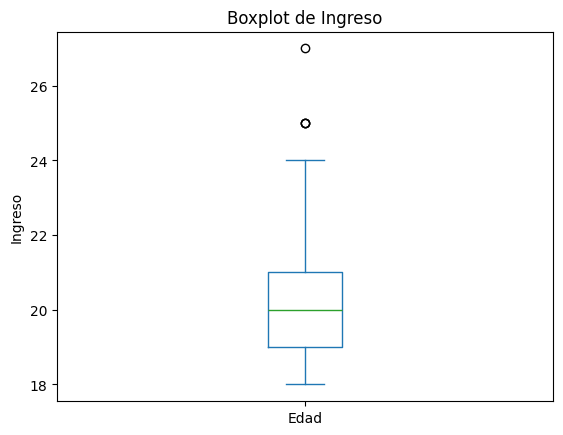

In [ ]:
df['Edad'].plot(kind='box')
plt.title('Boxplot de Ingreso')
plt.ylabel('Ingreso')
plt.show()

4. Para este ejemplo eliminaremos los valores atípicos para la Edad. Para hacerlo, eliminaremos los valores de edad superiores a 24 (ver Figura anterior):

In [ ]:
# Límites para outliers
limite_superior = 24
df = df[(df['Edad'] <= limite_superior)]

#3.Análisis descriptivo

El análisis descriptivo permite responder preguntas de lo que sucedió.

Se responderán las siguientes preguntas:

- ¿Quiénes compraron más, las mujeres o los hombres?
- ¿Cuáles fueron las ventas por año por Género?

1. Conteo por Género: Se presenta un diagrama circular del conteo por Género

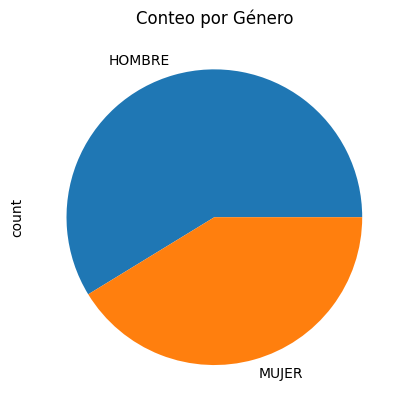

In [ ]:
conteo_genero = df['Género'].value_counts()
conteo_genero.plot(kind='pie')  #Puede reemplazarse kind por bar
plt.title('Conteo por Género')
plt.show()

In [ ]:
conteo_genero

,count
Género,
HOMBRE,380
MUJER,267


2. Ventas por año por género

Se presenta una Tabla de ventas (en millones) por año por género:

In [ ]:
ventas = df.groupby(['año', 'Género'])['Ventas'].sum().reset_index()
ventas

,año,Género,Ventas
0,2014,HOMBRE,5.930675e+07
1,2014,MUJER,2.911981e+07
2,2015,HOMBRE,7.279594e+07
3,2015,MUJER,3.350356e+07
4,2016,HOMBRE,8.882823e+07
5,2016,MUJER,4.006613e+07
6,2017,HOMBRE,1.063086e+08
7,2017,MUJER,4.665522e+07
8,2018,HOMBRE,1.259225e+08
9,2018,MUJER,5.144286e+07


Se presenta un gráfico tipo scatter con las ventas (en millones) por año por género:

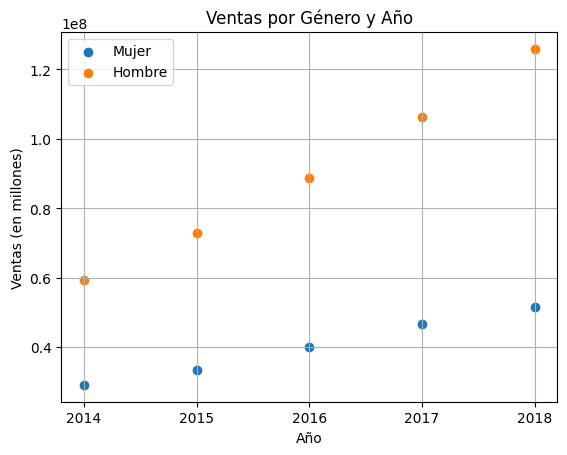

In [ ]:
ventas_mujer = ventas[ventas['Género'] == "MUJER"]
ventas_hombre = ventas[ventas['Género'] == "HOMBRE"]
plt.scatter(ventas_mujer['año'], ventas_mujer['Ventas'], label="Mujer")
plt.scatter(ventas_mujer['año'], ventas_hombre['Ventas'], label="Hombre")
plt.title('Ventas por Género y Año')
plt.xlabel('Año')
plt.ylabel('Ventas (en millones)')
plt.legend()
plt.xticks(ventas_hombre['año']) # Asegura que se muestren todos los años en el eje x
plt.grid(True)
plt.show()

#4.Análisis predictivo

El análisis predictivo permite responder preguntas de lo que ocurrirá en el futuro.

Se responderá la pregunta: Si se conserva la misma tendencia, ¿cuál será el valor de las ventas para los hombres hasta el año 2026?

Para predecir los valores futuros se empleará una interpolación:


In [ ]:
f_interp_hombre = interp1d(ventas_hombre['año'], ventas_hombre['Ventas'], kind='linear', fill_value='extrapolate')

Se calcula el valor de las ventas interpoladas hasta el año 2026:

In [ ]:
# Años para la interpolación
años_interp = np.arange(2014, 2027)

# Generar valor de Interpolación
interp_hombre = f_interp_hombre(años_interp)

Se visualizan los valores originales y los interpolados:

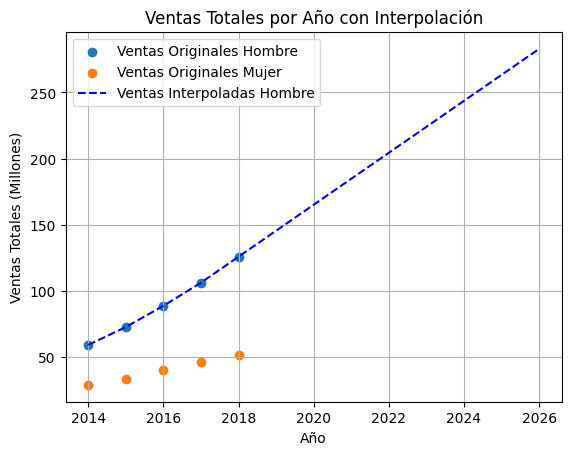

In [ ]:
plt.scatter(ventas_hombre['año'], ventas_hombre['Ventas']/1e6, label='Ventas Originales Hombre')
plt.scatter(ventas_mujer['año'], ventas_mujer['Ventas']/1e6, label='Ventas Originales Mujer')
plt.plot(años_interp, interp_hombre/1e6, color='blue', linestyle='--', label='Ventas Interpoladas Hombre')
plt.title('Ventas Totales por Año con Interpolación')
plt.xlabel('Año')
plt.ylabel('Ventas Totales (Millones)')
plt.legend()
plt.grid(True)
plt.show()